# [4.7] k-평균 알고리즘 (k-Means Clusting)


- 비지도학습(Unsupervised Learning) 알고리즘 > '분류'에 이용

## 이론


> Data간의 거리를 사용해 가까운 거리에 있는 Data끼리 클래스로 묶으면서 분류하는 알고리즘


k-평균 알고리즘(k-Means Clustering)은 Data간의 거리를 사용해서 Data들을 분류하기 때문에 수치화된 Data를 필요로한다.


k-평균 알고리즘은 다음의 단계를 거치면서 진행된다.

### 1. k값 정하기 - 몇 개의 군집(Cluster)으로 분류할 것인가


'k-평균 알고리즘'에서의 'k'는 **몇 개의 군집(Cluster)으로 Data들을 분류할 것인가**를 나타내는 변수이다.


이 k값은 사용자가 정의하는 하이퍼파라미터(Hyperparameter)이다.

### 2. 군집(Cluster)의 최초 중심(Centroid) 설정


'k'값을 정의했으면, 다음은 각각의 클러스터의 중심(Centroid)을 설정해야한다. Cluster의 수만큼 설정된 Centroid를 기준으로, Centroid와 Data 간의 거리를 비교하여 가장 가까운 Centroid의 Cluster로 분류하게 된다.


기본적으로 k-평균 알고리즘에서는 최초 Centroid를 **무작위**로 설정한다. 하지만, 상황에 따라선 최초 Centroid를 사용자가 먼저 설정할 수도 있다.


또한 scikit-learn의 `KMeans` 라이브러리의 'kmean++'라는 알고리즘을 적용할 수도 있다. 이 'kmean++' 알고리즘은 k-평균 알고리즘에서 기본적으로 채택하는 랜덤 Centroid 설정 방식을 보완하기 위해서 만들어진 알고리즘이다. 이 알고리즘에 대한 설명은 생략하도록 하겠다.

### 3. Data를 가장 가까운 군집(Cluster)으로 설정


2번에서 설명했던 것처럼, 랜덤으로 Centroid가 설정되었다면 이제 각각의 Centroid와 Data 간의 거리를 계산해서 제일 가까운 Centroid가 포함된 Cluster로 Data를 소속시키게 된다.


이 과정을 모든 Data들에 대해 적용하면, 모든 Data들은 각각 어느 한 Cluster에 소속을 가지게 된다.

### 4. 중심(Centroid)을 군집(Cluster)에 속한 Data들의 가운데 위치로 변경


3번 단계가 완료되면, 각각의 Cluster에 해당하는 Centroid의 위치를 변경한다.


그 위치는 **각각의 Cluster에 속한 Data들의 가운데**이다.

### 5. 중심(Centroid)가 바뀌지 않을 때까지 3, 4번 단계 반복


4번 단계에서 Centroid의 위치가 바뀌면, 그 바뀐 Centroid를 기준으로 다시 Data간의 거리를 계산해서 Data들을 어느 한 Cluster에 소속시킨다.


어떤 Data는 이전과 같은 Cluster에 속하게 될 것이고, 또 어떤 Data는 바뀐 후의 다른 Centroid와 더 가까워서 이전과 다른 Cluster에 속하게 될 수도 있다.


이 과정을 각각의 Centroid의 위치가 바뀌지 않을 때까지 계속해서 반복한다.


Centroid가 더 이상 바뀌지 않으면, k-평균 알고리즘에 의해서 Data의 분류가 완료된 것이다.

## 예제) 키와 몸무게에 따른 체형 군집화


말로만 설명해서 이해가 안됐을 수도 있으니, 간단한 Data를 이용하여 예제를 보면서 설명하겠다!

In [1]:
# 필요한 모듈 불러오기

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Data 만들기 및 시각화

In [2]:
df = pd.DataFrame(columns = ['height', 'weight'])

data_list = [
    [185,60],
    [180,60],
    [185,70],
    [165,63],
    [155,68],
    [170,75],
    [175,80]
]

for i in range(len(data_list)):
    df.loc[i] = data_list[i]
    
df

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68
5,170,75
6,175,80


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


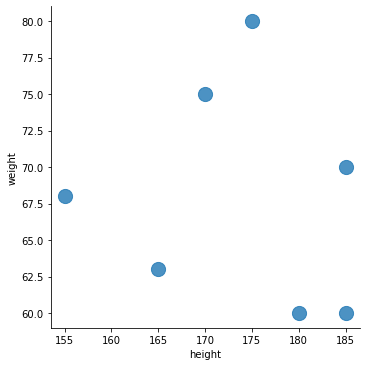

In [3]:
sns.lmplot('height', 'weight',
          data = df, fit_reg = False,
          scatter_kws = {'s': 200})

### k-평균 알고리즘 시각화

In [4]:
data_points = df.values
kmeans = KMeans(n_clusters = 3).fit(data_points)

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


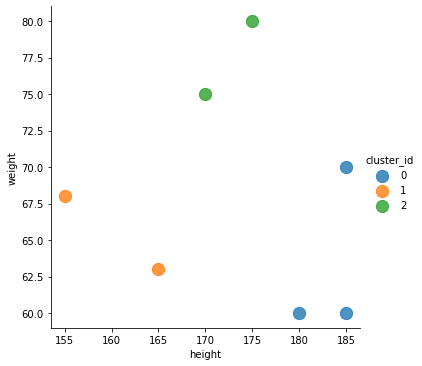

In [5]:
df['cluster_id'] = kmeans.labels_

sns.lmplot('height', 'weight', data = df, fit_reg = False,
          scatter_kws = {'s': 150}, hue = 'cluster_id')